In [7]:
import os
from options.test_options import TestOptions
from data import create_dataset
from models import create_model
from util.visualizer import save_images
from util import html
import torch
import torchvision as tv

opt = TestOptions().parse()  # get test options
# hard-code some parameters for test
opt.num_threads = 0   # test code only supports num_threads = 1
opt.batch_size = 1    # test code only supports batch_size = 1
opt.serial_batches = True  # disable data shuffling; comment this line if results on randomly chosen images are needed.
opt.no_flip = True    # no flip; comment this line if results on flipped images are needed.
opt.display_id = -1   # no visdom display; the test code saves the results to a HTML file.
opt.model='vae_pix2pix'
opt.netG='unet_256'
opt.dataroot='/home/host/data/training/height29_30km_pix2pix_sat_all_gau0.3'
opt.preprocess = []
opt.dataset_mode='aligned'
opt.name='1207_vae_sat_all'
opt.norm='batch'
opt.epoch=390
opt.input_nc=1
opt.output_nc=3
opt.preprocess=[]
sat_model = create_model(opt)
sat_model.setup(opt)
sat_model.eval()

opt.model='vae_pix2pix'
opt.dataroot='/home/host/data/training/height29_30km_pix2pix_hei_all_gau0.3/'
opt.name='1213_vae_hei_all'
opt.input_nc=1
opt.output_nc=1
opt.epoch="latest"
hei_model = create_model(opt)
hei_model.setup(opt)
hei_model.eval()

# latent_mean, U=torch.load('latent_data/mean_and_pca')

device='cuda:0'
# U=U.to(device).float()

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: None                          
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                             	[default: 0]
 

In [2]:
transform_hei = tv.transforms.Compose([tv.transforms.ToTensor(), 
                                       tv.transforms.Normalize((0.5), (0.5))
                                      ])
transform_sat = tv.transforms.Compose([tv.transforms.ToTensor(), 
                                       tv.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                      ])

In [3]:
from PIL import Image
img_A_hei = Image.open("results/1029_vae_hei_all/test_latest/images/00_0000_N27E101_real_A.png")
img_B_hei = Image.open("results/1210_vae_hei_all/val_latest/images/02_0000_N27E086_real_B.png")

# img_A_hei = Image.open("Structure.png")
# img_B_hei = Image.open("results/1026_vae_sat_all/test_latest/images/29_0000_N56W131_real_A.png")
img_A_sat = Image.open("results/1026_vae_sat_all/test_latest/images/29_0001_N27E101_real_A.png")
img_B_sat = Image.open("results/1026_vae_sat_all/test_latest/images/29_0001_N55W131_real_B.png")
A_hei = transform_hei(img_A_hei)[:1, :, :].unsqueeze(0).to(device)
B_hei = transform_hei(img_B_hei)[:1, :, :].unsqueeze(0).to(device)
A_sat = transform_sat(img_A_sat)[:1, :, :].unsqueeze(0).to(device)
B_sat = transform_sat(img_B_sat).unsqueeze(0).to(device)

In [4]:
import numpy as np
latent_hei = torch.tensor(np.zeros((1, 16, 256, 256)),  dtype=torch.float).to(device)
latent_sat = torch.tensor(np.random.rand(1, 16, 256, 256) * 2 - 1,  dtype=torch.float).to(device)

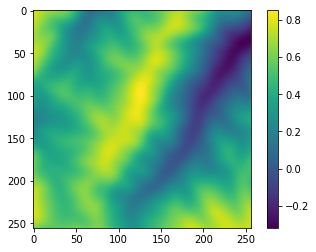

In [5]:
import matplotlib.pyplot as plt
plt.imshow(A_hei[0, 0].cpu().detach())
plt.colorbar()

/root/anaconda3/envs/scifair/lib/python3.8/site-packages/torch/nn/functional.py:2970: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "


tensor(-0.5323, device='cuda:0', grad_fn=<MinBackward1>) tensor(1., device='cuda:0', grad_fn=<MaxBackward1>)


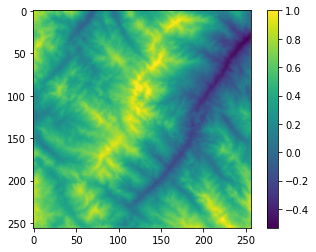

In [6]:
# input_hei = torch.cat((A_hei, latent_hei), dim=1)

hei_model.real_A = A_hei
hei_model.real_B = B_hei
hei_model.forward()
# hei_model.test()
vis = hei_model.get_current_visuals()
fake = ""
for label, im_data in vis.items():
    if label=='fake_B':
        fake = im_data
print(fake.min(), fake.max())
# print(fake1.min(), fake1.max())
# print(torch.nn.L1Loss()(fake, fake1) * 128)
plt.imshow(fake[0, 0].cpu().detach())
plt.colorbar()


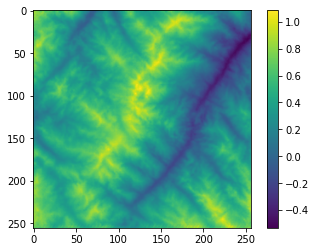

In [75]:
fake1 = fake
plt.imshow(fake1[0, 0].cpu().detach())
plt.colorbar()

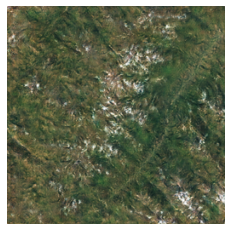

In [76]:
from PIL import Image
img_A_hei = Image.open("results/1026_vae_hei_all/test_latest/images/25_0005_N56W131_real_A.png")
img_B_hei = Image.open("results/1026_vae_hei_all/test_latest/images/25_0005_N56W131_real_B.png")

# img_A_hei = Image.open("Structure.png")
# img_B_hei = Image.open("results/1026_vae_sat_all/test_latest/images/29_0000_N56W131_real_A.png")
img_A_sat = Image.open("results/1026_vae_sat_all/test_latest/images/29_0001_N27E101_real_A.png")
img_B_sat = Image.open("results/1207_vae_sat_all/val_390/images/02_0002_N27E100_real_B.png")
A_hei = transform_hei(img_A_hei)[:1, :, :].unsqueeze(0).to(device)
B_hei = transform_hei(img_B_hei)[:1, :, :].unsqueeze(0).to(device)
A_sat = transform_sat(img_A_sat)[:1, :, :].unsqueeze(0).to(device)
B_sat = transform_sat(img_B_sat).unsqueeze(0).to(device)

sat_model.real_A = fake1
sat_model.real_B = B_sat
# latent_sat = torch.tensor(np.random.rand(1, 16, 256, 256) * 2 - 1 - 1,  dtype=torch.float).to(device)
sat_model.forward()
# hei_model.test()
vis = sat_model.get_current_visuals()
fake = ""
for label, im_data in vis.items():
    if label=='fake_B':
        fake = im_data

plt.axis('off')
plt.imshow((fake[0] / 2 + 0.5).permute(1, 2, 0).cpu().detach())


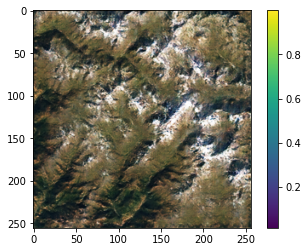

In [62]:
plt.imshow((fake[0] / 2 + 0.5).permute(1, 2, 0).cpu().detach())
plt.colorbar()

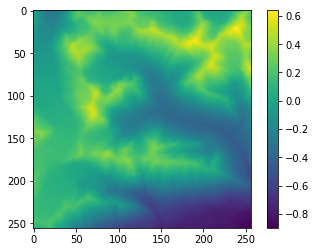

In [9]:
import matplotlib.pyplot as plt
plt.imshow(A_sat[0, 0].cpu().detach())
plt.colorbar()